# INTRODUCTION

We will working on Biomechanical Features of Orthopedic Patients data set. 

<font color='purple'>

Contetnt:
    
  
    
1. [Load and Check Data](#1)
2. [Basic Data Analysis (EDA)](#2)
3. [Regression](#3)
    
    * [Linear Regression](#4)
    
    
    
4. [K-Nearest Neighbor (k-NN)](#5)
5. [Support Vector Machine(SVM)](#6)
6. [Naive Bayes Classification](#7)   
7. [Decision Tree Classification](#8)
8. [Random Forest Classification](#9)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
## Load and Check Data

In [ ]:
data=pd.read_csv("../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
data.head(20)

In [ ]:
data.columns
data.describe()

In [ ]:
data.info()

### 1. Float64(6):


* pelvic_incidence 
* pelvic_tilt numeric
* lumbar_lordosis_angle
* sacral_slope
* pelvic_radius
* degree_spondylolisthesis


### 2. Object(1):


* class

<a id="2"></a>
# Basic Data Analysis (EDA)

In [ ]:
colors = ['purple' if i == 'Normal' else 'cyan' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns !='class'],
                                       c = colors,
                                       figsize =[30,30],
                                       diagonal ='hist',    
                                       alpha = 0.9,
                                       s = 300,
                                       marker = '.',
                                       edgecolor="black"
                          )
plt.savefig('graph4.png')
plt.show()

In [ ]:
sns.countplot(x="class",data=data)

In [ ]:
data.head(20)

<a id="3"></a>
# Regression

<a id="4"></a>
# Linear Regression


In [ ]:
plt.scatter(data.lumbar_lordosis_angle,data.sacral_slope)
plt.xlabel("lumbar_lordosis_angle")
plt.ylabel("sacral_slope")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
x=data.lumbar_lordosis_angle.values.reshape(-1,1)
y=data.sacral_slope.values.reshape(-1,1)
linear_reg.fit(x,y)

In [ ]:
# PREDICTION
prediction=np.linspace(min(x),max(x)).reshape(-1,1)
y_head= linear_reg.predict(prediction)

In [ ]:
# VISUALIZATION
plt.plot(prediction,y_head,color='red',linewidth=3,alpha=0.9)
plt.scatter(x=x,y=y)
plt.xlabel("lumbar_lordosis_angle")
plt.ylabel("sacral_slope")
plt.show()

<a id="5"></a>

# K-Nearest Neighbor (k-NN)


Calculate distances between all data and new data.  The input consists of the k closest training examples in data set. 



In [ ]:
N=data[data['class']=="Normal"]
A=data[data['class']=="Abnormal"]


In [ ]:
# Visualization
plt.scatter(N.pelvic_incidence,N.pelvic_radius,color="green",label="GOOD")
plt.scatter(A.pelvic_incidence,A.pelvic_radius,color="red",label="BAD")
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_radius")
plt.legend()
plt.show()

In classification we cannot use object. So we must convert object to integer or categorical

In [ ]:
data['class']=[1 if each=="Normal" else 0 for each in data['class']]
data.info() 

In [ ]:
x_data=data.drop(["class"],axis=1) # Drop the class feature.
data_class=data['class']
y=data_class.values # Only class feature

## NORMALIZATION

We should normalize the variables in data set. Because some features has high value. This situation can cause big mistakes.  




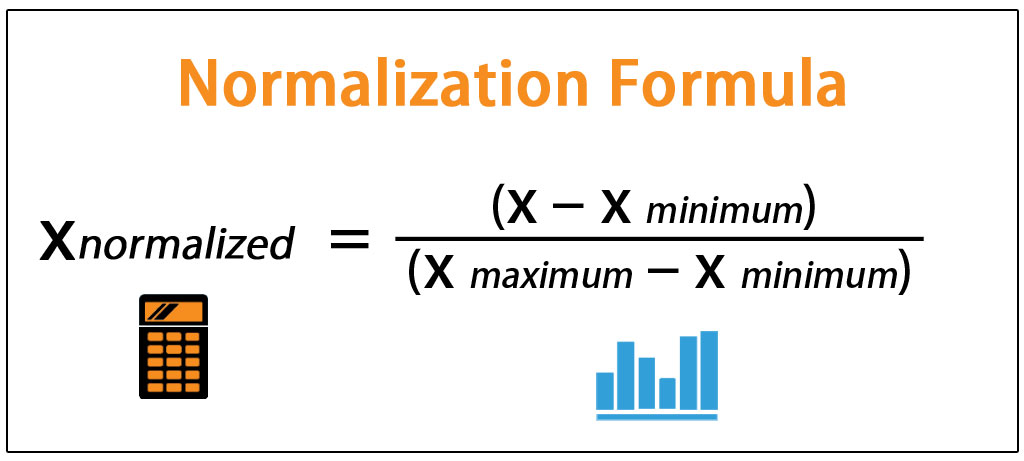

In [ ]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

## TRAIN and TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)


In [ ]:
print("K-NN Accuracy : {}".format(knn.score(x_test,y_test)))

## Lets Find Best K Value

In [ ]:
score_list=[]
for each in range(1,50):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,50),score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

We see that k=22 is giving best result :)

<a id="6"></a>
# Support Vector Machine(SVM)


In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

In [ ]:
# TEST
print("Accuracy of SVM Algorithm: ",svm.score(x_test,y_test))

<a id="7"></a>
# Navie Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)


<a id="8"></a>
# Decision Tree Classification

In [ ]:
#TEST
print("Accuracy of Navie Bayes Algorithm: ",nb.score(x_test,y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_class=DecisionTreeClassifier()
decision_class.fit(x_train,y_train)

In [ ]:
# TEST
print("Accuracy of Decision Tree Classification: ",decision_class.score(x_test,y_test))

<a id="9"></a>
# Random Forest Classification



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
# n_estimators is number of trees
rf.fit(x_train,y_train)

In [ ]:
# TEST
print("Accuracy of Random Forst Classification Algorithm: ",rf.score(x_test,y_test))